# PfDA Assignment 2 2023

## An analysis of paleo-present climate data 

Linda Grealish

***

<img src = images/climate_montage.png alt= "Climate change Images" width = "700" height = "auto">

***

# Table of Contents
1. [Introduction](#overview)  
    - [Problem Statement](#problem-statement)
    - [Background](#background)
    - [About this notebook](#about-this-notebook-and-python-libraries-used)
2. [CO2 Data](#co2-data)
3. [Temperature Data](#temp-data)
4. [Analysis of CO2 and Temperature Anomoly](#co2-temp-analysis)
5. [CH4 Data](#ch4-data)
6. [Irish Context](#irish-context)
7. [Predict Global Temperature Anomaly](#predict-anomaly)
8. [Export Fused Data](#export-data)
9. [Conclusion](#conclusion)

***

## 1. Introduction and Project Overview <a id="overview"></a>

This notebook contains my submission for the Programming for Data Analysis Module 2023 module at ATU as part of the Higher Diploma in Computing and Data Analytics.

### Problem statement <a id="problem-statement"></a>

- Analyse CO2 vs Temperature Anomaly from 800kyrs – present. 
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage) 
- Examine Irish context: o Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13) 
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats 
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis). 
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue  
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage) 

Use a Jupyter notebook for your analysis and track your progress using GitHub. 

Use an academic referencing style 

### Background <a id="background"></a>

Paleoclimatology is the study of previous climates that have existed during Earth's different geologic ages [1].  We can then use data gathered to try to identify the causes of climate changes that have happened in the past in order to better understand our present and future climate.

Paleoclimatology has also helped scientists study and understand how other environmental factors, such as continental drift, solar energy, greenhouses gases in the atmosphere, and the variation in Earth’s orbit have all affected the climate of Earth over time.

The science of paleoclimatology is vital to our understanding of climate on Earth. As scientists become increasingly aware of how climates have been influenced in the past, they can develop models that help predict how increased carbon dioxide levels and other changes might impact the climate of Earth in the future.

> [1] https://education.nationalgeographic.org/resource/paleoclimatology-RL/

<a id="notebook"></a>
## About this notebook and python libraries used

This project was mainly developed using the python and the following packages:

- Pandas provides data analysis tools and is designed for working with tabular data that contains an ordered collection of columns where each column can have a different value type. 
- NumPy is one of the most important packages for numerical and scientific computing in Python.
- SciPy is an open-source software for mathematics, science, and engineering. It includes modules for statistics, optimization, integration, linear algebra, Fourier transforms, signal and image processing, ODE solvers, and more
- Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [1]:
# Importing libraries and modules necessary for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import datetime as dt
import math
from scipy import signal
from sklearn.linear_model import LinearRegression



***

## 2. CO2 Data <a id="co2-data"></a>

The CO2 data being analysed at is a composite of atmospheric CO2 records from Antartic ice cores and can be found in this reposoitory as a .xls file [CO2_IPCC](/Data/CO2_IPCC.xls).  The data in this file spans a timeframe of 800k years before present, where present date is 1950 [2].  This version compiled by Bereiter et al. in 2014 replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.

The ice core data is gathered by drilling into ice sheets and extracting ice core samples which are then analysed to identify deposits within the ice, such as pollen and gas.  By drilling down into the ice sheet or glacier and recovering ice from ancient times, scientists are able to determine the past composition and behavior of the atmosphere, what the climate was like when the snow fell, and how the size of ice sheets and glaciers have changed in the past in response to different climate conditions. Ice cores have provided climate and ice dynamics information over many hundred thousand years in very high, sometimes seasonal, resolution.

The information gathered from these ice cores allows paleoclimatologists to better understand atmospheric and climatic conditions that existed when particular layers of the sheet formed and to determine how and why climate changed in the past.

> [1] https://en.wikipedia.org/wiki/Before_Present

In [2]:
# Read in the CO2 data from IPCC xls file, skipping the first 14 rows. 
# https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls

co2_IPCC = pd.read_excel('data/CO2_IPCC.xls', sheet_name='CO2 Composite', skiprows=range(14))

In [3]:
co2_IPCC.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


In [4]:
co2_IPCC.describe()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
count,1901.000000,1901.000000,1901.000000
mean,242810.270113,235.566624,1.340519
std,274261.195468,35.902698,0.924188
min,-51.030000,173.713620,0.010000
25%,14606.209000,204.826743,0.639335
50%,74525.645000,232.456008,1.073871
75%,504177.187879,257.930000,1.800000
max,805668.868405,368.022488,9.960000



In order to make the data more relateable and easier to compare with the other datasets I will convert the column 'Gasage (yr BP)' to the same year format that is seen in the other datasets.


In [5]:
# Convert the Gasage yr BP format 
years = 1950 - co2_IPCC['Gasage (yr BP)']

In [6]:
# Add a new column to the dataframe with the converted year
co2_IPCC.loc[:, "year"] = (years).astype(int)

As the IPCC dataset only contains data up until 1950 a second dataset is also being used and can be found in this repository as a .csv file [CO2_Mauna_Loa](/Data/co2_mauna_loa.csv) and was downloaded from the [NOAA website](https://gml.noaa.gov/ccgg/trends/data.html).  The data gathered at the Mauna Loa Observatory in Hawaii gives the annual mean CO2 measurements but unlike the IPCC data which gathers the CO2 data from ice cores the data is collected from measuring concentration of CO2 in the air.  

The location of the observatory at an altitude of 3,400m, near the summit of Mauna Loa, is well situated to measure air masses that are representative of very large areas. [1]

> [1] https://gml.noaa.gov/ccgg/about/co2_measurements.html

In [7]:
# Read in the CO2 data from Mauna Loa .csv file, skipping the first 43 rows. 
# https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2014GL061957&file=grl52461-sup-0003-supplementary.xls

co2_maunaloa = pd.read_csv('data/co2_mauna_loa.csv', skiprows=range(43))
co2_maunaloa.describe()

,year,mean,unc
count,64.000000,64.000000,6.400000e+01
mean,1990.500000,358.293437,1.200000e-01
std,18.618987,30.580414,9.791247e-17
min,1959.000000,315.980000,1.200000e-01
25%,1974.750000,330.895000,1.200000e-01
50%,1990.500000,355.075000,1.200000e-01
75%,2006.250000,382.572500,1.200000e-01
max,2022.000000,418.530000,1.200000e-01


In order to analyse the 2 data sets they will need to be merged.

In [8]:
# Change the name of the column in Mauna Loa csv file to match that of IPCC file
# https://stackoverflow.com/questions/46066685/rename-the-column-inside-csv-file
co2_maunaloa = co2_maunaloa.rename(columns=({'mean':'CO2 (ppmv)'}))


In [9]:
# Merge the 2 CO2 dataframes
# https://pandas.pydata.org/docs/user_guide/merging.html
co2_relevant_columns = co2_maunaloa[['year', 'CO2 (ppmv)']]
co2_merged = pd.concat([co2_relevant_columns, co2_IPCC[['year', 'CO2 (ppmv)']]])
co2_merged = co2_merged.sort_values(by='year') 

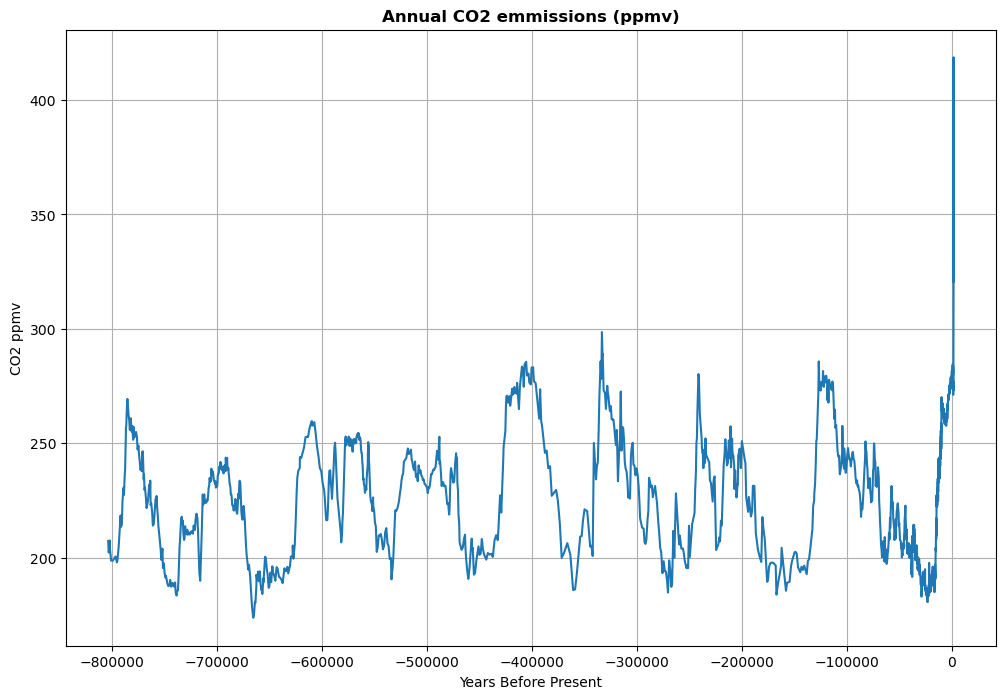

In [10]:
# Check how the merged CO2 data looks
plt.figure(figsize=(12,8))
plt.plot(co2_merged['year'],co2_merged['CO2 (ppmv)'])
plt.xlabel('Years Before Present')
plt.ylabel('CO2 ppmv')
plt.title('Annual CO2 emmissions (ppmv)', weight='bold')
plt.grid()
plt.show()


***

## 3. Temperature Data <a id="temp-data"></a>

The next section will focus on the data relating to temperature and temperature anomoly.  

The term temperature anomoly means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value. https://www.ncei.noaa.gov/access/monitoring/global-temperature-anomalies/#:~:text=The%20term%20temperature%20anomaly%20means,cooler%20than%20the%20reference%20value.

The temperature data being analysed was provided by the lecturer and can be found in this reposoitory as a .txt file [temp_data_jouzel](/Data/temp_data_jouzel.txt).  Similar to the CO2 data this dataset spans a timescale of over 800k years and also uses the Before Present model where BP is 1950.  

In [11]:
# Read in the CO2 data from Jouzel txt file
# Change the name of the 'Age' column to match that on CO2 merged data
# Remove any null values using.dropna() function
temp = pd.read_csv('data/temp_data_Jouzel.txt', sep='\s+', skiprows=range(91))
#temp = temp.rename(columns=({'Age':'year'})) 
temp = temp.dropna()


In [12]:
# Convert the year from BP to the same format as the CO2 
years = 1950 - temp['Age']
temp.loc[:, "year"] = (years).astype(int)

In [13]:
temp.describe()


,Bag,ztop,Age,Deuterium,Temperature,year
count,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,2907.847364,1598.766050,190506.560624,-417.796420,-4.580228,-188556.164564
std,1670.376955,918.707325,192554.547328,18.000275,3.446971,192554.675749
min,13.000000,6.600000,38.373790,-449.500000,-10.580000,-799712.000000
25%,1462.000000,803.550000,46793.812500,-432.500000,-7.450000,-271388.000000
50%,2908.000000,1598.850000,122110.190000,-421.300000,-5.200000,-120160.000000
75%,4354.000000,2394.150000,273338.430000,-403.300000,-1.820000,-44843.000000
max,5800.000000,3189.450000,801662.000000,-361.200000,5.460000,1911.000000


From the above we can see that the min value for 'year' is 38 BP whoich means this data only contains data until 1911 so in order to complete the data up until the current year I found data on the NOAA website[1] which has the temperature anomaly from 1912 to 2023 can be found in this repository as a .csv file [temp_data_NOAA](/Data/temp_data_NOAA.csv).

> [1] https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/11/1912-2023


In [14]:
# Read in the NOAA temp data
# Rename the colums to match that of CO2 dataframes
temp_NOAA = pd.read_csv('data/temp_data_NOAA.csv', skiprows=range(4))
temp_NOAA = temp_NOAA.rename(columns=({'Year':'year', 'Anomaly':'Temperature'})) 
temp_NOAA.describe()


,year,Temperature
count,112.000000,112.000000
mean,1967.500000,0.200446
std,32.475632,0.377246
min,1912.000000,-0.400000
25%,1939.750000,-0.052500
50%,1967.500000,0.095000
75%,1995.250000,0.420000
max,2023.000000,1.440000


In [15]:
# Merge the 2 temperature anomaly dataframes
temp_merged = pd.concat([temp_NOAA, temp[['year', 'Temperature']]])
temp_merged = temp_merged.sort_values(by='year') 
temp_merged.describe()

,year,Temperature
count,5897.000000,5897.000000
mean,-184937.604206,-4.489430
std,192482.278271,3.476275
min,-799712.000000,-10.580000
25%,-265126.000000,-7.410000
50%,-117809.000000,-5.130000
75%,-40877.000000,-1.570000
max,2023.000000,5.460000


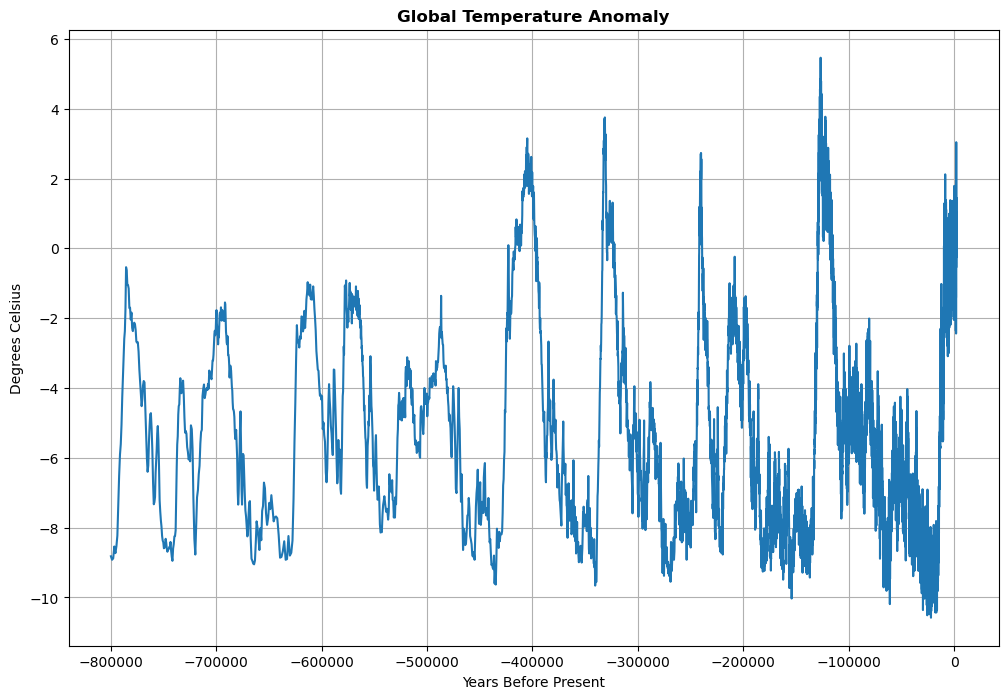

In [16]:
# Check how the merged temp data looks
plt.figure(figsize=(12,8))
plt.plot(temp_merged['year'],temp_merged['Temperature'])
plt.xlabel('Years Before Present')
plt.ylabel('Degrees Celsius')
plt.title('Global Temperature Anomaly', weight='bold')
plt.grid()
plt.show()

***

## 4. Analysis of CO2 and Temperature Anomoly <a id="co2-temp-analysis"></a>


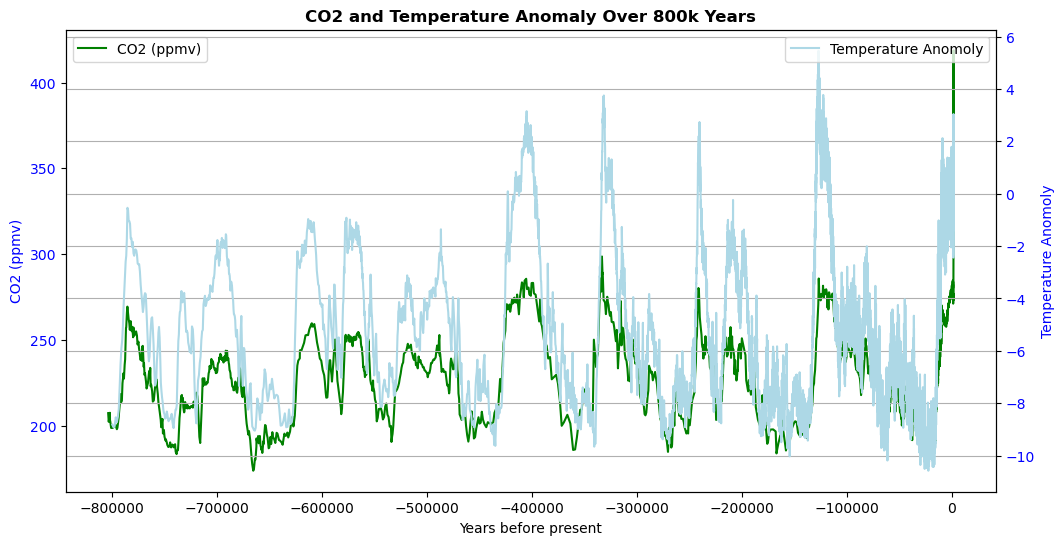

In [17]:
# Create a plot that displays merged CO2 and temp datasets
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2=ax1.twinx()

# Plot CO2 data
ax1.plot(co2_merged['year'], co2_merged['CO2 (ppmv)'], label='CO2 (ppmv)', color='green')
ax1.set_ylabel('CO2 (ppmv)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.set_xlabel('Years before present')


# Plot temperature data
ax2.plot(temp_merged['year'], temp_merged['Temperature'], label='Temperature Anomoly', color='lightblue')
ax2.set_ylabel('Temperature Anomoly', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.title('CO2 and Temperature Anomaly Over 800k Years', weight='bold')
plt.grid()
plt.show()

<img src = images/CO2vsTemp.png alt= "CO2 vs Temp " width = "700" height = "auto">

> https://skepticalscience.com/co2-lags-temperature.htm

> https://skepticalscience.com/images/Milankovitch_Cycles_400000.gif



<img src = images/antartica_plots.png alt= "CO2 vs Temp " width = "700" height = "auto"> 
<br>

> Image produced based on data from Parrenin et al. 2013; Snyder et al. 2016; Bereiter et al. 2015. Ben Henley and Nerilie Abram. https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368

The plots produde above based on the imported data seem to align quite closely with these reference plots that have been extracted from 2 different sources with all three showing a clear upward trend for both CO2 and temperature anomaly.

In [18]:
# Combine the CO2 and Temperature Anomoly dataframes 
co2_temp_merged = pd.concat([co2_merged, temp_merged])
co2_temp_merged = co2_temp_merged.sort_values(by='year') 
co2_temp_merged.describe()

,year,CO2 (ppmv),Temperature
count,7862.000000,1965.000000,5897.000000
mean,-196937.716739,239.563833,-4.489430
std,216484.185153,41.854818,3.476275
min,-803718.000000,173.713620,-10.580000
25%,-301955.250000,205.650990,-7.410000
50%,-112762.000000,233.900000,-5.130000
75%,-27288.500000,262.300000,-1.570000
max,2023.000000,418.530000,5.460000


In [19]:
co2_temp_merged['year'] = pd.to_datetime
co2_temp_merged.dtypes

year            object
CO2 (ppmv)     float64
Temperature    float64
dtype: object

In [20]:
co2_temp_merged.corr()

C:\Users\lgrealish\AppData\Local\Temp\ipykernel_20484\1886986222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co2_temp_merged.corr()


,CO2 (ppmv),Temperature
CO2 (ppmv),1.0,NaN
Temperature,NaN,1.0


By using the *corr()* function it should give us an indictaion as to whether there is a positive or negative correlation between variables.  If the correlation matrix returns a value of 1 then this indicates that there is a very close correlation between these 2 variables.  In this instance the function is not reurbing what I would expect.

### Trend

The relationship between CO2 measurements and temperature anomoly is a key aspect of climate science with lots of research pointing to the strong correlation between the increasing CO2 levels and the rise in annual global temperatures.  The scientific consensus is that human activities, particularly the burning of fossil fuels, have led to a significant increase in CO2 concentrations, contributing to the observed global warming.  This consensus is reflected in reports by major scientific organizations, including the IPCC.[1]

While it is widely accepted that CO2 is a major contributor, human activities and other greenhouse gases also play roles in impact on global temperatures.

> [1] https://www.ipcc.ch/report/ar6/wg3/downloads/report/IPCC_AR6_WGIII_SPM.pdf

### Temporal leads/lags



The lead/lag effect refers to the relationship between time series, more specifically how change in one series can have a delayed effect on another.
Changes in global atmospheric CO2 are lagging 9.5–10 months behind changes in global air surface temperature. [1]


https://machinehack.com/story/what-is-the-lead-lag-effect-and-how-is-it-used-in-statistics

https://www.sciencedirect.com/science/article/abs/pii/S0921818112001658#:~:text=The%20maximum%20positive%20correlation%20between,to%20global%20lower%20troposphere%20temperature.


>  [1] Heilig, G.K. The phase relation between atmospheric carbon dioxide and global temperature (2013).https://doi.org/10.1016/j.gloplacha.2012.08.008


In [21]:
# https://stackoverflow.com/questions/69117617/how-to-find-the-lag-between-two-time-series-using-cross-correlation

x = temp_merged
y = co2_merged
correlation = signal.correlate(x-np.mean(x, axis=0), y - np.mean(y, axis=0), mode="full")
lags = signal.correlation_lags(len(x), len(y), mode="full")
lag = lags[np.argmax(abs(correlation))]

print(lag)


3929


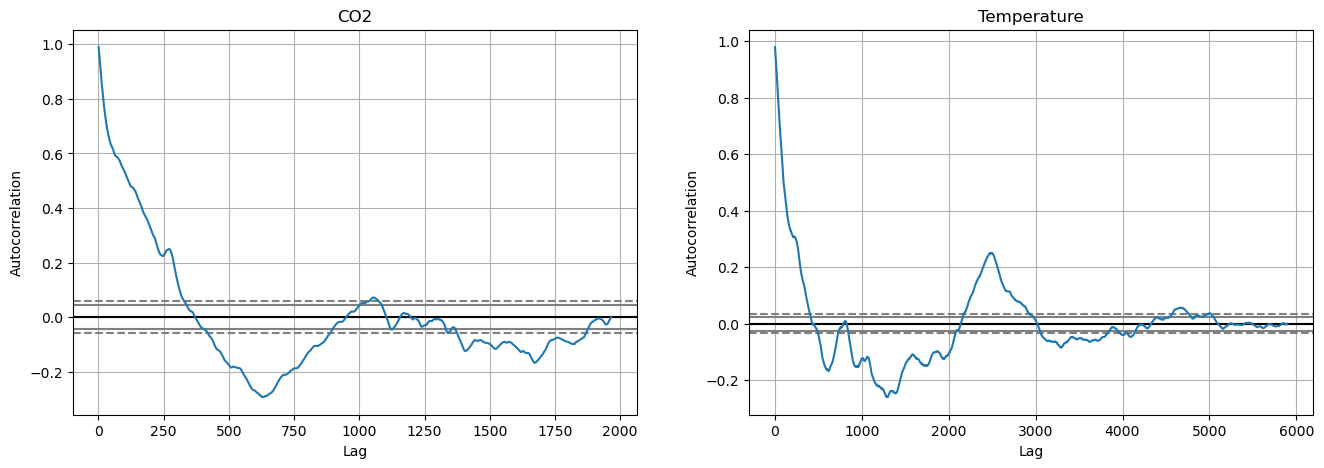

In [22]:
from pandas.plotting import autocorrelation_plot
fig, axs = plt.subplots(1,2, figsize=(16,5)) # 1 row, 2 columns

autocorrelation_plot(co2_merged['CO2 (ppmv)'], ax=axs[0])
autocorrelation_plot(temp_merged['Temperature'], ax=axs[1])
axs[0].set_title('CO2')
axs[1].set_title('Temperature')
plt.show()

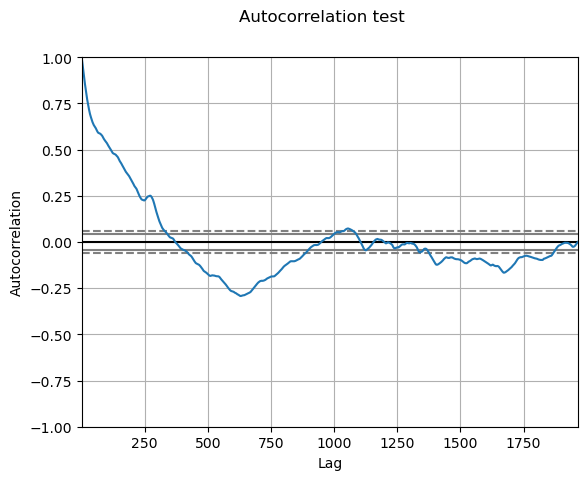

In [23]:
from pandas.plotting import autocorrelation_plot
plt.suptitle('Autocorrelation test')
autocorrelation_plot(co2_merged['CO2 (ppmv)'])
plt.show()

In [24]:
def autocorr(self, lag=1):
    """
    Lag-N autocorrelation

    Parameters
    ----------
    lag : int, default 1
        Number of lags to apply before performing autocorrelation.

    Returns
    -------
    autocorr : float
    """
    return self.corr(self.shift(lag))

In [25]:
datax = co2_merged['CO2 (ppmv)']
datay = temp_merged['Temperature']



def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

print(datax.corr(datay.shift(lag)))

0.1515138238210714


The cross correlation value of CO2 and Temperature is 0.1515138238210714 meaning that there is a positive correlation betwen the two variables.

***

## 5. CH4 Data <a id="ch4-data"></a>

CH4 (Methane) is an important greenhouse gas, responsible for around 30% of the rise in global temperatures since the industrial revolution. [1] [2] 

Methane is a naturally occuring atmospheric gas and is found both below ground and under the seafloor being formed by both geological and biological processes.  In addition to naturally occuring methane it is also a by product from activities such as waster water treatment plants, manure production, biomass burning and landfills. [3] 

The Earth's atmospheric methane concentration has increased by about 160% since 1750, with the overwhelming percentage caused by human activity.[1]

> [1] https://en.wikipedia.org/wiki/Methane <br>
> [2] https://www.iea.org/reports/global-methane-tracker-2022/methane-and-climate-change<br>
> [3] https://www.pranaair.com/what-is-methane/

The first dataset is from the NOAA website and can be found in this repository as a .txt file [CH4_EPICA](/Data/ch4_EPICA.txt) and was downloaded from the NOAA website [1].

> [1] (https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt).  

In [26]:
# Read in the CH4 data from EPICA txt file
# Remove any null values using.dropna() function
ch4_EPICA = pd.read_csv('data/ch4_EPICA.txt', skiprows=153, sep='\\s+')
ch4_EPICA = ch4_EPICA.dropna()

In [27]:
# Change the format on the 'Age' columns to match the format used for c02 and temp dataframes
years = 1950 - ch4_EPICA['Age']
ch4_EPICA.loc[:, "year"] = (years).astype(int)

In [28]:
ch4_EPICA.describe()

,Depth,Age,mean,1s,year
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,1878.243642,270905.078459,519.970043,10.053780,-268955.078459
std,1022.330187,243182.183065,88.047494,0.615278,243182.183065
min,99.340000,13.000000,342.000000,10.000000,-797446.000000
25%,818.430000,44282.500000,450.000000,10.000000,-426365.000000
50%,2235.230000,225906.000000,509.000000,10.000000,-223956.000000
75%,2786.265000,428315.000000,589.000000,10.000000,-42332.500000
max,3190.530000,799396.000000,907.000000,22.200000,1937.000000


As we can see this dataset only contains records as far as 1937 so a second dataset which was again sourced from the NOAA website [1] and can be found in this repository as a .txt file [CH4_NOAA](/Data/ch4_NOAA.txt).  

> [1] https://gml.noaa.gov/ccgg/trends_ch4/

In [29]:
# Read in the CH4 data from NOAA txt file
# Remove any null values using.dropna() function
ch4_NOAA = pd.read_csv('data/ch4_NOAA.txt', skiprows=45, sep='\\s+')
ch4_NOAA = ch4_NOAA.dropna()

In [30]:
# Merging both CH4 datasets
ch4_relevant_columns = ch4_EPICA[['year', 'mean']]

ch4_merged = pd.concat([ch4_relevant_columns, ch4_NOAA])
ch4_merged = ch4_merged.sort_values(by='year') 
ch4_merged.describe()

,year,mean,unc
count,2142.000000,2142.000000,39.000000
mean,-264021.668067,542.838964,0.620000
std,243666.490429,189.465492,0.096926
min,-797446.000000,342.000000,0.420000
25%,-422996.250000,451.000000,0.550000
50%,-217132.000000,512.000000,0.630000
75%,-38865.000000,593.750000,0.680000
max,2022.000000,1911.830000,0.820000


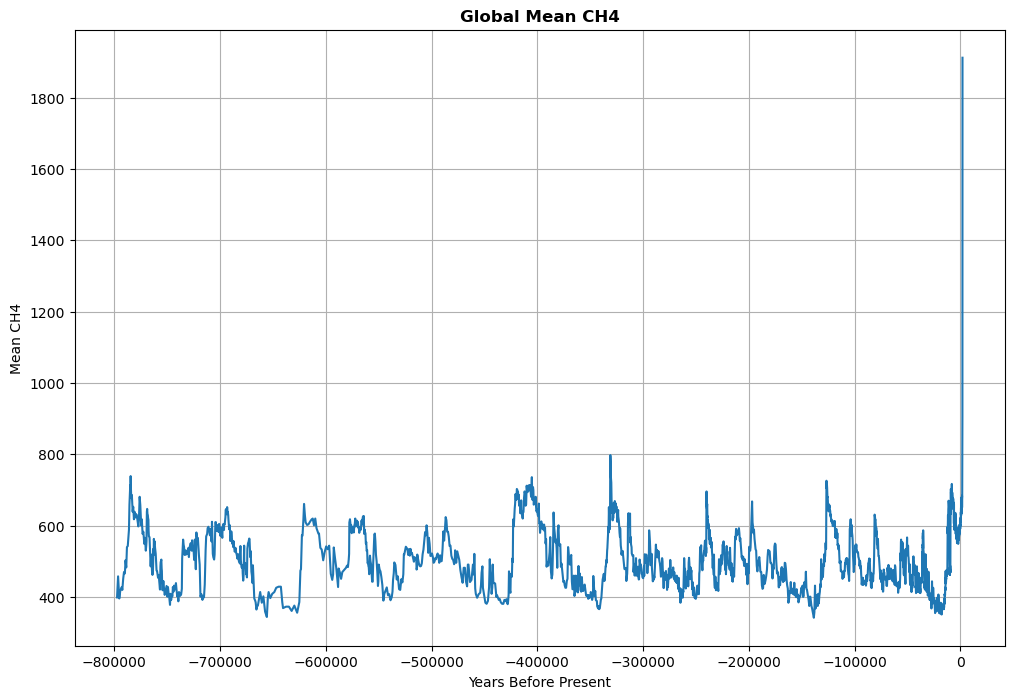

In [31]:
# Check how the merged CH4 data looks
plt.figure(figsize=(12,8))
plt.plot(ch4_merged['year'],ch4_merged['mean'])
plt.xlabel('Years Before Present')
plt.ylabel('Mean CH4')
plt.title('Global Mean CH4', weight='bold')
plt.grid()
plt.show()

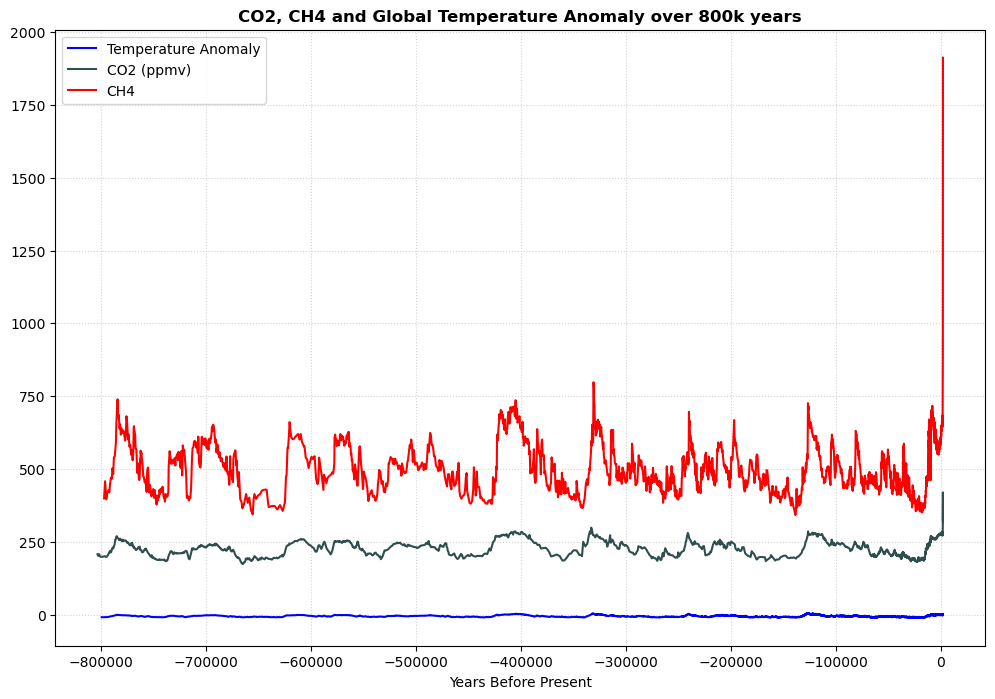

In [32]:
# Create a plot for CO2, CH4 and Temperature data
plt.figure(figsize=(12,8))
plt.plot(temp_merged['year'], temp_merged['Temperature'], color = "blue", label = 'Temperature Anomaly')
plt.plot(co2_merged['year'], co2_merged['CO2 (ppmv)'], color = "darkslategrey", label = 'CO2 (ppmv)')
plt.plot(ch4_merged['year'],ch4_merged['mean'], color = "red", label = 'CH4')
plt.xlabel('Years Before Present')
plt.title('CO2, CH4 and Global Temperature Anomaly over 800k years', weight='bold')
plt.legend()
plt.grid(True, linestyle=':', color='lightgrey')
plt.show()

By creating a plot with CO2, CH4 and temperature data displayed I had hoped to see what, if any, correlation there may be between these variables.  While it's very clear to see the upward trend of both CO2 and CH4 measurements in recent years it's a bit more difficult to see any obvious upward trends on this, I suspect because of the variations of measuremenst within the variables.  I will replot with both CO2 and CH4 on one y axis to see if that produces a more useful visualisation.

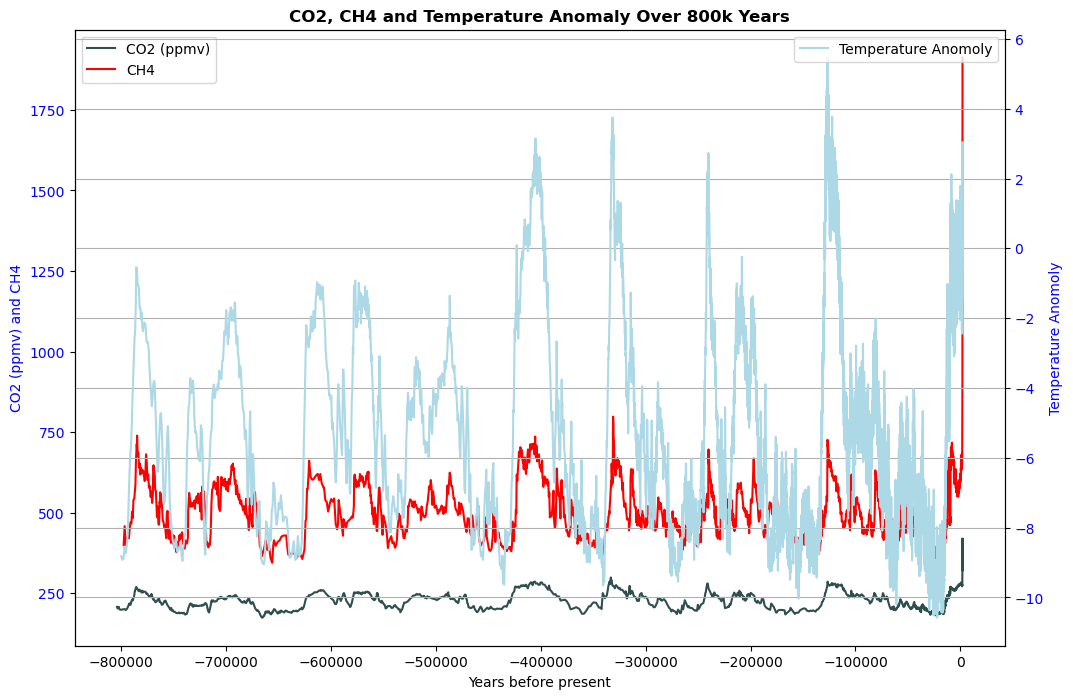

In [33]:
# Create a plot for CO2, CH4 and Temperature data
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2=ax1.twinx()


# Plot CO2 and CH4 data
ax1.plot(co2_merged['year'], co2_merged['CO2 (ppmv)'], label='CO2 (ppmv)', color="darkslategrey")
ax1.plot(ch4_merged['year'], ch4_merged['mean'], label='CH4', color='red')
ax1.set_ylabel('CO2 (ppmv) and CH4', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.set_xlabel('Years before present')


# Plot temperature data
ax2.plot(temp_merged['year'], temp_merged['Temperature'], label='Temperature Anomoly', color='lightblue')
ax2.set_ylabel('Temperature Anomoly', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')


plt.title('CO2, CH4 and Temperature Anomaly Over 800k Years', weight='bold')
plt.grid()
plt.show()

This is a much clearer plot and we can see the upward trends in all 3 of the plotted variables and on first sight there seems to be a correlation between all 3.  In order to get a clearer look I will analyse the same data (CO2, CH4 and Temperature anomaly) but only from 1800 to the present day.

In [34]:
# Define dataframes for each variable for years after 1800
temp_after1800=temp_merged[temp_merged["year"] > 1800]
co2_after1800=co2_merged[co2_merged["year"] > 1800]
ch4_after1800=ch4_merged[ch4_merged["year"] > 1800]

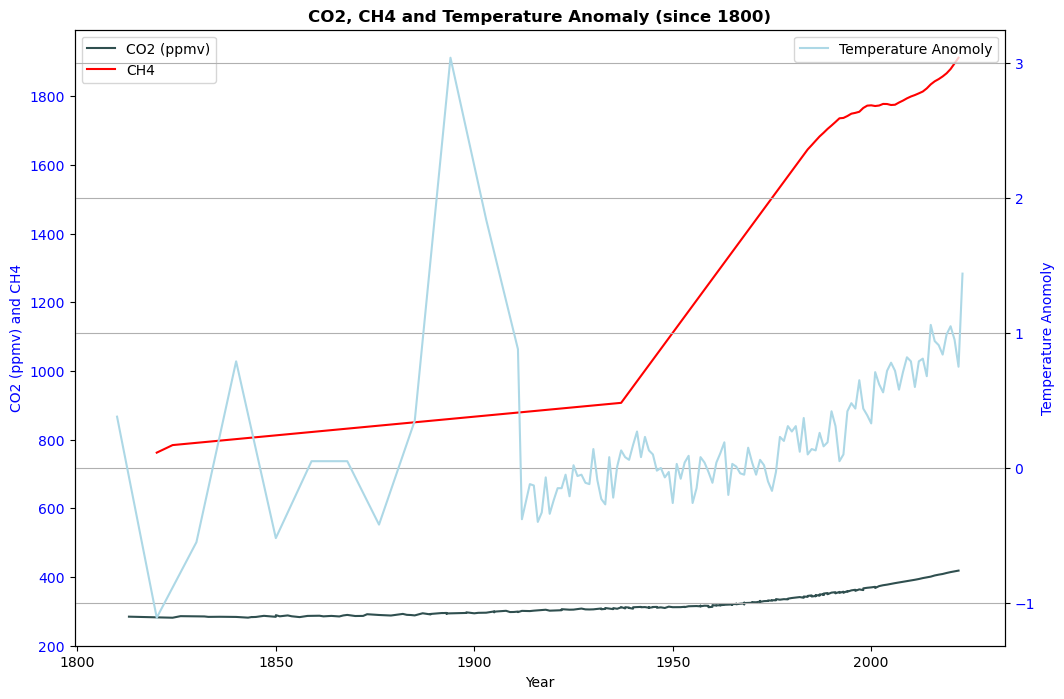

In [35]:
# Create a plot for CO2, CH4 and Temperature data
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2=ax1.twinx()


# Plot CO2 and CH4 data
ax1.plot(co2_after1800['year'], co2_after1800['CO2 (ppmv)'], label='CO2 (ppmv)', color="darkslategrey")
ax1.plot(ch4_after1800['year'], ch4_after1800['mean'], label='CH4', color='red')
ax1.set_ylabel('CO2 (ppmv) and CH4', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.set_xlabel('Year')


# Plot temperature data
ax2.plot(temp_after1800['year'], temp_after1800['Temperature'], label='Temperature Anomoly', color='lightblue')
ax2.set_ylabel('Temperature Anomoly', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.title('CO2, CH4 and Temperature Anomaly (since 1800)', weight='bold')
plt.grid()
plt.show()

***

## 6. Irish Context <a id="irish-context"></a>


https://climateknowledgeportal.worldbank.org/country/ireland


In [36]:
irish_temp = pd.read_csv('data/irish_temp.csv')


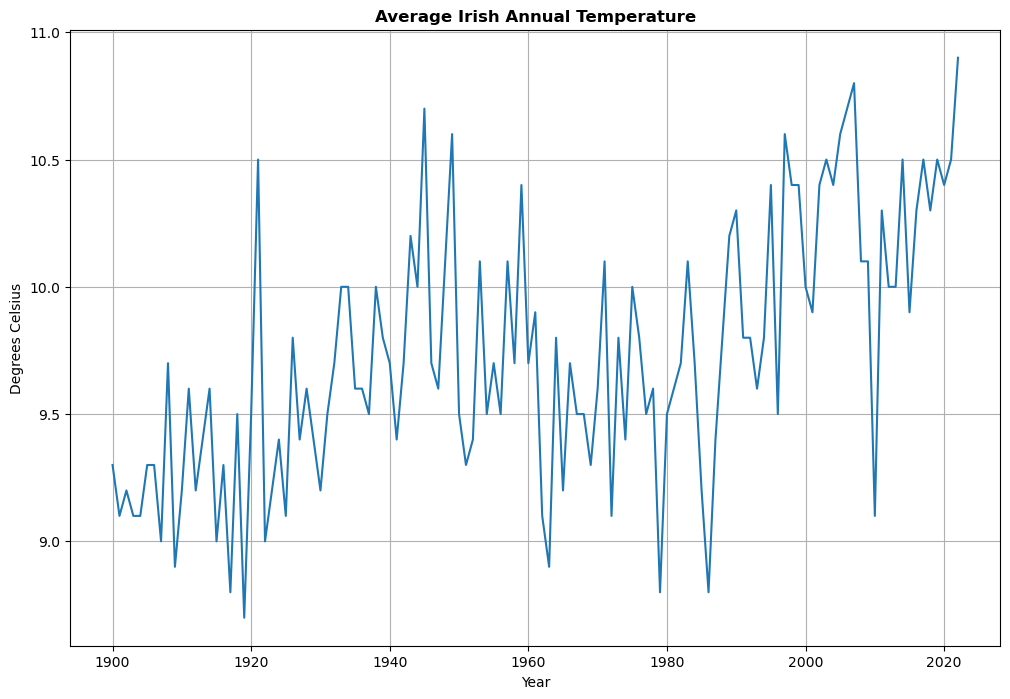

In [37]:
# Create a plot for CO2, CH4 and Temperature data
plt.figure(figsize=(12,8))
plt.plot(irish_temp['year'],irish_temp['Annual'])
plt.xlabel('Year')
plt.ylabel('Degrees Celsius')
plt.title('Average Irish Annual Temperature', weight='bold')
plt.grid()
plt.show()

In [38]:
temp_after1900=temp_merged[temp_merged["year"] > 1900]

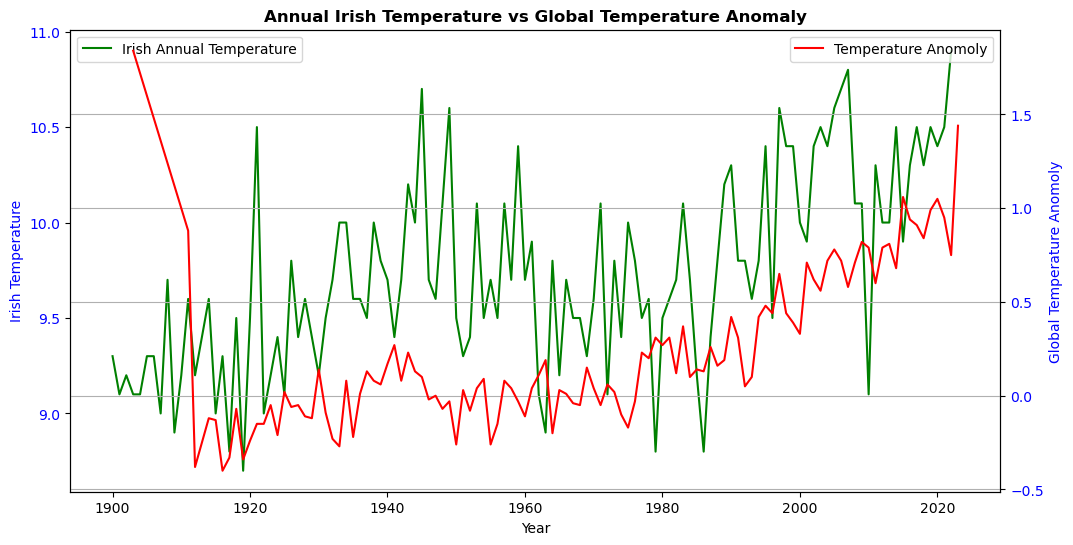

In [39]:
# Create a plot for Irish temperature and global temperature anomaly
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2=ax1.twinx()

# Plot CO2 data
ax1.plot(irish_temp['year'], irish_temp['Annual'], label='Irish Annual Temperature', color='green')
ax1.set_ylabel('Irish Temperature', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.set_xlabel('Year')


# Plot temperature data
ax2.plot(temp_after1900['year'], temp_after1900['Temperature'], label='Temperature Anomoly', color='red')
ax2.set_ylabel('Global Temperature Anomoly', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

plt.title('Annual Irish Temperature vs Global Temperature Anomaly', weight='bold')
plt.grid()
plt.show()

From the plot above it appears that the Irish annual temperature is following the upward trend for global temperature anomolies.

In [40]:
irish_rain = pd.read_csv('data/irish_rainfall.csv')

In [41]:
# https://stackoverflow.com/questions/75319277/how-to-convert-monthly-data-to-yearly-data-with-the-value-as-the-mean-average-ov
# https://saturncloud.io/blog/how-to-get-the-average-of-a-groupby-with-pandas/
irish_rain_annual = irish_rain.groupby('Year')['Median montly series'].mean()

In [42]:
irish_rain_annual.columns = ["Year", "Annual_rainfall"]
irish_rain_annual.head()

Year
1711     90.966667
1712    104.383333
1713     81.875000
1714     73.683333
1715    104.833333
Name: Median montly series, dtype: float64

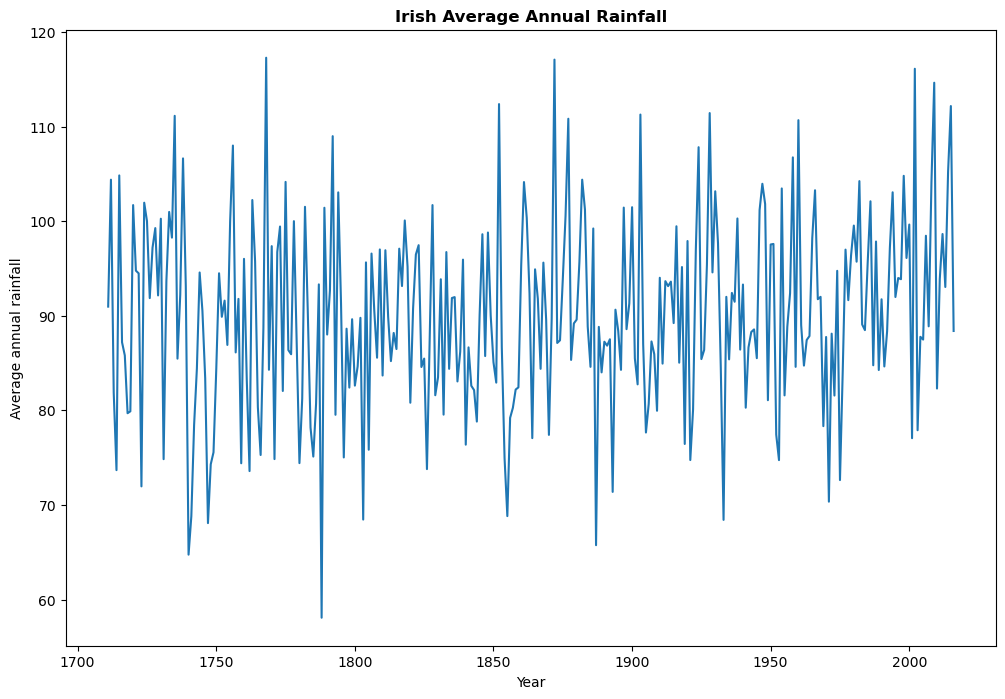

In [43]:
irish_rainfall_trend=irish_rain_annual.mean()

plt.figure(figsize=(12,8))
plt.plot(irish_rain_annual)
plt.xlabel('Year')
plt.ylabel('Average annual rainfall')
plt.title('Irish Average Annual Rainfall', weight="bold")

plt.show()

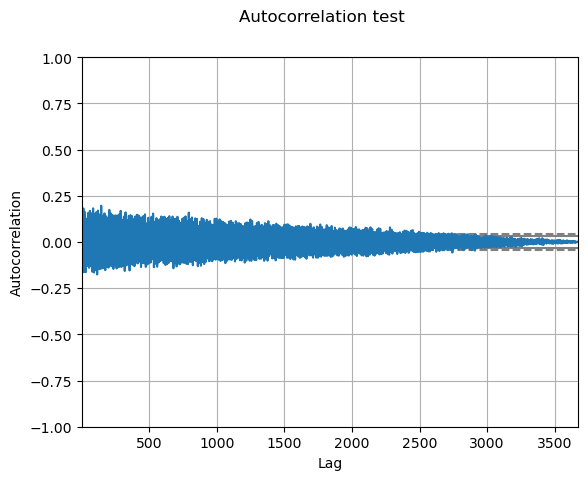

In [44]:
from pandas.plotting import autocorrelation_plot
plt.suptitle('Autocorrelation test')
autocorrelation_plot(irish_rain['Median montly series'])
plt.show()

***

## 7. Predict Global Temperatures Anomaly <a id="predict-anomaly"></a>

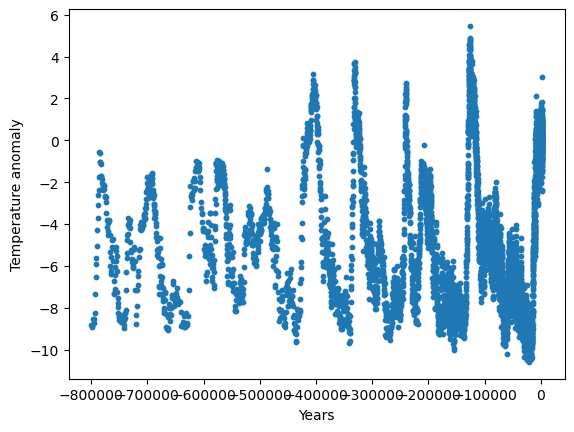

In [45]:
x=temp_merged['year']
y=temp_merged['Temperature']
plt.scatter(x,y,s=10)
plt.xlabel('Years')
plt.ylabel('Temperature anomaly')
plt.show()


In [46]:
temp_after1900=temp_merged[temp_merged["year"] > 1900]

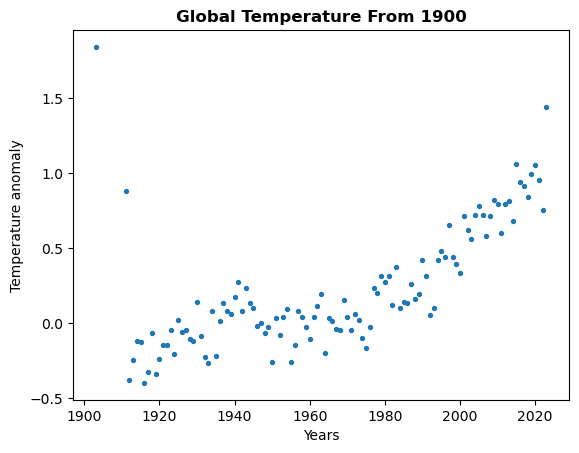

Correlation coefficient: 0.6659497790871376


In [47]:
x=temp_after1900['year']
y=temp_after1900['Temperature']
plt.scatter(x,y,s=8)
plt.xlabel('Years')
plt.ylabel('Temperature anomaly')
plt.title('Global Temperature From 1900', weight="bold")
plt.show()
print(f'Correlation coefficient: {x.corr(y)}')

In [48]:
# https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
# https://stackoverflow.com/questions/58337612/error-when-calculating-predicted-values-of-polynomial-regression-python
# https://stackoverflow.com/questions/73132252/valueerror-x-has-1-features-but-linearregression-is-expecting-2-features-as-in
# https://scikit-learn.org/stable/tutorial/basic/tutorial.html


x = np.array([temp_after1900['year']]).reshape(-1,1) 
y = np.array([temp_after1900['Temperature']]).reshape(-1,1)   

In [49]:
model = LinearRegression()

In [50]:
model.fit(x,y)

LinearRegression()

In [51]:
prediction =model.predict(y)

In [52]:
x_test = np.linspace(1900,2050)
x_testshaped = x_test.reshape(-1,1)
y_testprediction = model.predict(x_testshaped)

In [53]:
y_testprediction

array([[-0.3248011 ],
       [-0.29966247],
       [-0.27452384],
       [-0.24938521],
       [-0.22424658],
       [-0.19910795],
       [-0.17396932],
       [-0.1488307 ],
       [-0.12369207],
       [-0.09855344],
       [-0.07341481],
       [-0.04827618],
       [-0.02313755],
       [ 0.00200108],
       [ 0.02713971],
       [ 0.05227833],
       [ 0.07741696],
       [ 0.10255559],
       [ 0.12769422],
       [ 0.15283285],
       [ 0.17797148],
       [ 0.20311011],
       [ 0.22824874],
       [ 0.25338737],
       [ 0.27852599],
       [ 0.30366462],
       [ 0.32880325],
       [ 0.35394188],
       [ 0.37908051],
       [ 0.40421914],
       [ 0.42935777],
       [ 0.4544964 ],
       [ 0.47963503],
       [ 0.50477365],
       [ 0.52991228],
       [ 0.55505091],
       [ 0.58018954],
       [ 0.60532817],
       [ 0.6304668 ],
       [ 0.65560543],
       [ 0.68074406],
       [ 0.70588269],
       [ 0.73102131],
       [ 0.75615994],
       [ 0.78129857],
       [ 0

Looking at the output of the *y_testprediction* function above we can see that by 2050 the global temperature anomoly is expected to be approx 0.90699172 degrees celsius.  This is broadly in line with the figures calculated by Wang et al. [1]

>  [1] Leon Wang, Leigh Wang, Yang, Li, John Wang. A century-long analysis of global warming and earth temperature using a random walk with drift approach.  https://doi.org/10.1016/j.dajour.2023.100237

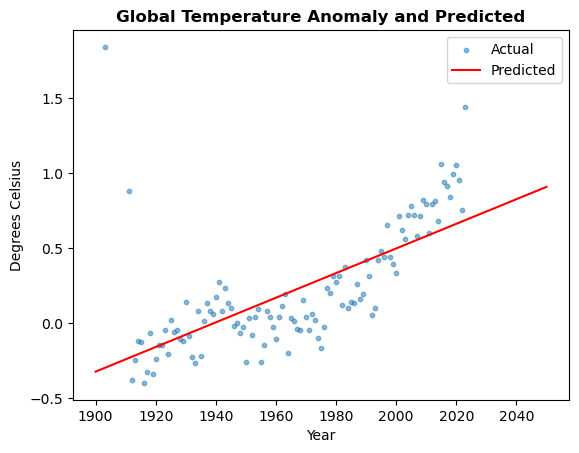

In [54]:
# Create plot showing actual temperature anomalies since 1900 and predicted temperatures to 2050

plt.scatter(x,y,s=10,alpha=0.5, label='Actual')
plt.plot(x_test,y_testprediction,'r',label='Predicted')
plt.xlabel('Year')
plt.ylabel('Degrees Celsius')
plt.title('Global Temperature Anomaly and Predicted', weight="bold")

plt.legend()
plt.show()

***

## 8. Export Fused Data <a id="export-data"></a>

In [55]:
# Combine CO2, Temp anomaly and CH4 data to one single dataframe

co2_temp_ch4_merged = pd.concat([co2_merged, temp_merged, ch4_merged])
co2_temp_ch4_merged = co2_temp_ch4_merged.sort_values(by='year') 
co2_temp_ch4_merged = co2_temp_ch4_merged.rename(columns=({'mean':'Mean CH4'})) 
co2_temp_ch4_merged.describe()

,year,CO2 (ppmv),Temperature,Mean CH4,unc
count,10004.000000,1965.000000,5897.000000,2142.000000,39.000000
mean,-211301.353659,239.563833,-4.489430,542.838964,0.620000
std,224265.910713,41.854818,3.476275,189.465492,0.096926
min,-803718.000000,173.713620,-10.580000,342.000000,0.420000
25%,-330044.250000,205.650990,-7.410000,451.000000,0.550000
50%,-121556.500000,233.900000,-5.130000,512.000000,0.630000
75%,-30126.500000,262.300000,-1.570000,593.750000,0.680000
max,2023.000000,418.530000,5.460000,1911.830000,0.820000


In [56]:
# Test for correlation between variables in the combined dataframe
co2_temp_ch4_merged.corr().dropna()

,year,CO2 (ppmv),Temperature,Mean CH4,unc
year,1.0,0.273639,0.013875,0.142942,0.157876


In [57]:
# Output the merged CO2, Temperature, CH4 data to  .csv and .json file 
# https://stackoverflow.com/questions/29271520/valueerror-dataframe-index-must-be-unique-for-orient-columns

co2_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_merged_data.csv', index=False)
co2_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_merged_data.json', orient="split")

temp_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/temp_merged_data.csv', index=False)
temp_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/temp_merged_data.json', orient="split")

ch4_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/ch4_merged_data.csv', index=False)
ch4_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/ch4_merged_data.json', orient="split")

co2_temp_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_temp_merged.csv', index=False)
co2_temp_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_temp_merged.json', orient="split")

co2_temp_ch4_merged.to_csv('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_temp_ch4_merged.csv', index=False)
co2_temp_ch4_merged.to_json('C:/Users/lgrealish/repo/PfDA_Project_2/data_export_files/co2_temp_ch4_merged.json', orient="split")


***

## 9. Conclusion <a id="conclusion"></a>

The aim of this project was to source, examine, combine and interpret various datasets, including CO2, CH4, global temperature anomalies as well as Irish rainfall and annual average temperatures and then used linear regression to synthesise predictions based on those findings.  These combined dataframes were exported as .csv and .json files so can be used again for further analysis and investigation.  There are some discrepancies between the historical data and the more modern data (post 1950) which would need further investigation and processing but suffice for the purposes of this project.

The CO2 data over the last 800k years show various peaks and troughs but has remained largely between 280 and 180 ppmv which is due to natural variations in the Earths systems, glacial and interglacial periods.  However in more recent years the rates have risen at a rate that is not in line with historical trends with the mean atmospheric CO2 figure for 2022 standing at over 418 ppmv which is the highest ever recorded.

The temperature anomaly data similarly has been rising at a rate that is not on a par with the changing levels over the 800k years.  2023 marks the first tim eon record that every day within year has exceeded 1°C above the 1850-1900 pre-industrial level. Close to 50% of days were more than 1.5°C warmer then the 1850-1900 level, and two days in November were, for the first time, more than 2°C warmer. [1]

The concentration of CH4 in the atmosphere has more than doubled over the past 200 years.

From looking at the data it is clear that there is a correlation between atmospheric CO2, CH4 and rising global temperatures.  

This has been a challenging and interesting project to undertake.  Although the findings of this project are in no way surprising given the amount of global attention that climate change is rightly been given, it has increased my understanding of how the data is gathered and interpreted. I  

> [1]https://climate.copernicus.eu/copernicus-2023-hottest-year-record#:~:text=Global%20surface%20air%20temperature%20highlights%3A&text=2023%20marks%20the%20first%20time,than%202%C2%B0C%20warmer.

***

## Resources <a id="resources"></a>

https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13

https://xlrd.readthedocs.io/en/latest/

https://gml.noaa.gov/ccgg/trends/data.html

https://www.met.ie/climate/available-data/long-term-data-sets/

https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03

https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/


## Background Reading

https://www.ipcc.ch/site/assets/uploads/2018/03/srccs_chapter2-1.pdf

https://education.nationalgeographic.org/resource/paleoclimatology-RL/

https://icecores.org/about-ice-cores#:~:text=CO2%20in%20the%20Ice%20Core%20Record&text=Over%20400%2C000%20years%2C%20and%20even,to%20warmer%20in%20interglacial%20periods

https://gml.noaa.gov/ccgg/about/co2_measurements.html

https://factsonclimate.org/infographics/concentration-warming-relationship

https://mural.maynoothuniversity.ie/9352/1/CM_305%20year.pdf